In [1]:
import pandas as pd
import io
import requests

In [19]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
s=requests.get(url).content

In [61]:
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
c = c.drop('Lat', 1)
c = c.drop('Long', 1)
c = c.drop('Province/State', 1)
cT = c.T.rename_axis('Date')
cT.columns = cT.iloc[0]
cT = cT.drop(cT.index[0])
cT.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Mali,Saint Kitts and Nevis,Canada,Canada,Kosovo,Burma,United Kingdom,United Kingdom,United Kingdom,MS Zaandam
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

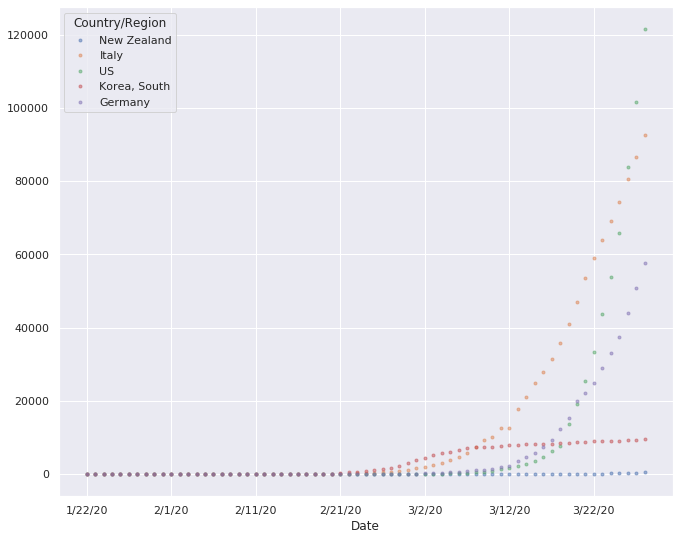

In [84]:
cols_plot = ['New Zealand','Italy','US', 'Korea, South','Germany']
cT[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

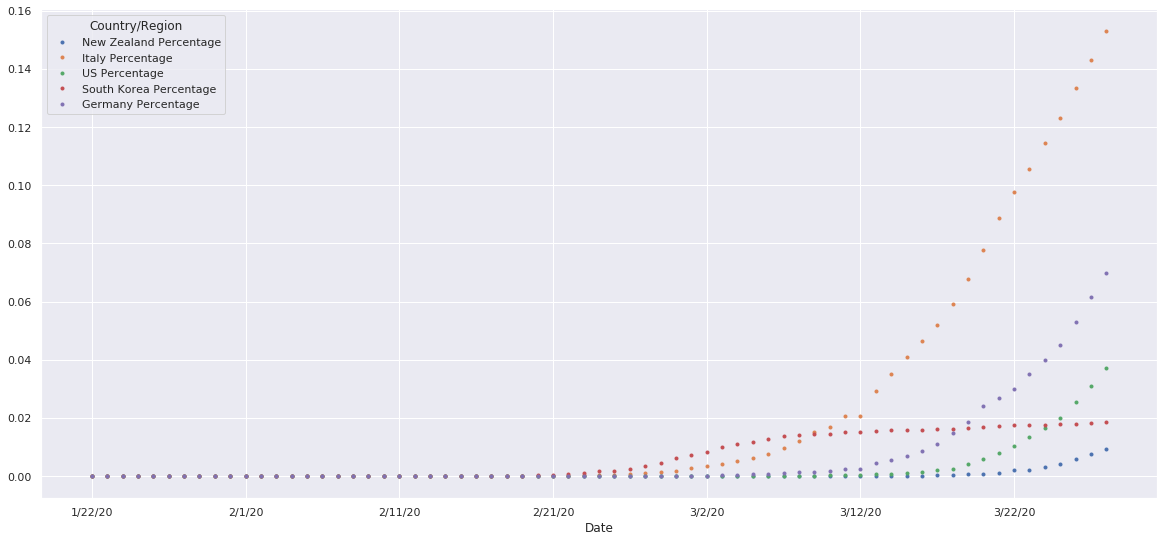

In [87]:
cT['New Zealand Percentage'] = cT['New Zealand'].apply(lambda x: float(int(x)/4794000*100))
cT['Italy Percentage'] = cT['Italy'].apply(lambda x: float(x/60480000*100))
cT['US Percentage'] = cT['US'].apply(lambda x: float(x/327200000*100))
cT['South Korea Percentage'] = cT['Korea, South'].apply(lambda x: float(x/51470000*100))
cT['Germany Percentage'] = cT['Germany'].apply(lambda x: float(x/82790000*100))
percent_plot = ['New Zealand Percentage','Italy Percentage', 'US Percentage','South Korea Percentage','Germany Percentage']
cT[percent_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(20, 9))